Sentiment Analysis of Twitter data using Naive Bayes Classifier

----------START----------

In [51]:
import tweepy
import csv
import twitter
import time
import re
import nltk
import chardet
import pandas as pd
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import matplotlib
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Twitter Aunthentication with Python - Handshkaking.
Creation of Twitter application on the twitter developers account and then performing the aunthentication

In [33]:
def auntentication():
    """Keys to aunthenticate the twitter application with our python code"""
    CONSUMER_KEY = 'tQH7sGi4VUTgTQ8Vq1CEsf5c1'
    CONSUMER_SECRET = 'iWptKtX9eb7RKdAT8NsfljxWkRvbzhzb25CbNcKe4UhEU1wltu'
    ACCESS_TOKEN = '844857311013158912-OcS1nrun1i4kXEhbrD7FxHfmQEhi3PY'
    ACCESS_TOKEN_SECRET = 'gADobY1ONjzVSlGZfd9OBzpgjXFaxpcsiWRhGwMgbkxdZ'


    """Function to authenticate the application using Handshake method"""
    auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
    auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)
    api = tweepy.API(auth)
    return api

Building the Testing Dataset
The user inputs the hastag, extraction of tweets takes place via twitter API.
We can restrict the tweets with various paarmeters like time period, language and id.
We have restricted with only English language.

In [34]:
def createTestSet(search_keyword, api):

        tweets_fetched = tweepy.Cursor(api.search, q=search_keyword, lang ="en").items(100)

        return [{"text": status.text, "label": None} for status in tweets_fetched]

Storing the Test dataset in a csv file

In [35]:
def writeExtractedTweets(test_data_set) :

    csvFile = open('TestDataSet.csv', 'w')
    csvWriter = csv.writer(csvFile, delimiter=',', quotechar="\"")
    for row in test_data_set :
        try:
            csvWriter.writerow([row["text"], row["label"]])
        except Exception as e:
            # print(e)
            continue;

Building of Training dataset with necessary labels

In [36]:
def createTrainingSet(corpusFile, tweetDataFile):

    counter = 0;
    corpus = []

    with open(corpusFile, 'r') as csvfile:
        lineReader = csv.reader(csvfile, delimiter=',', quotechar="\"")
        for row in lineReader:
            corpus.append({"tweet_id": row[2], "label": row[1], "topic": row[0]})

    rate_limit = 180
    sleep_time = 900 / 180
    # sleep_time = 2
    trainingDataSet = []

    for tweet in corpus:
        try:
            tweetFetched = api.get_status(tweet["tweet_id"])
            print("Tweet fetched" + tweetFetched.text)
            tweet["text"] = tweetFetched.text
            trainingDataSet.append(tweet)
            time.sleep(sleep_time)
        except:
            continue
    # Now we write them to the empty CSV file
    with open(tweetDataFile, 'w') as csvfile:
        linewriter = csv.writer(csvfile, delimiter=',', quotechar="\"")
        for tweet in trainingDataSet:
            try:
                linewriter.writerow([tweet["tweet_id"], tweet["text"], tweet["label"], tweet["topic"]])
            except Exception as e:
                print(e)
    return trainingDataSet

Editing the training data with necessary labels

In [37]:
def read_data_set(tweet_data_file):
    new_data = []

    with open(tweet_data_file, 'r') as csvfile:
        try:
            lineReader = csv.reader(csvfile, delimiter=',', quotechar="\"")
        except Exception as e:
                print(e)

        for row in lineReader:
            new_data.append({"tweet_id": row[0],"text": row[1], "label": row[2], "topic": row[3]})

    return new_data

Preprocessing of Training and Testing Dataset

In [38]:
class PreProcessTweets:
    def __init__(self):
        self._stopwords = set(stopwords.words('english') + list(punctuation) + ['AT_USER', 'URL'])

    def processTweets(self, list_of_tweets):
        processedTweets = []
        for tweet in list_of_tweets:
            processedTweets.append((self._processTweet(tweet["text"]), tweet["label"]))
        return processedTweets

    def _processTweet(self, tweet):
        tweet = tweet.lower()  # convert text to lower-case
        tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'URL', tweet)  # remove URLs
        tweet = re.sub('@[^\s]+', 'AT_USER', tweet)  # remove usernames
        tweet = re.sub(r'#([^\s]+)', r'\1', tweet)  # remove the # in #hashtag
        tweet = word_tokenize(tweet)  # remove repeated characters (helloooooooo into hello)
        return [word for word in tweet if word not in self._stopwords]

Building the Vocabulary and extracting the features from the Training dataset

In [39]:
def buildVocabulary(preprocessedTrainingData):
    all_words = []

    for (words, sentiment) in preprocessedTrainingData:
        all_words.extend(words)

    wordlist = nltk.FreqDist(all_words)
    word_features = wordlist.keys()

    return word_features

In [40]:
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in tweet_words)
    return features

Final output of the Project

In [41]:
def results() :
    # get the majority vote
    if NBResultLabels.count('positive') > NBResultLabels.count('negative'):
        print("Overall Positive Sentiment")
        print("Positive Sentiment Percentage = " + str(100 * NBResultLabels.count('positive') / len(NBResultLabels)) + "%")
    else:
        print("Overall Negative Sentiment")
        print("Negative Sentiment Percentage = " + str(100 * NBResultLabels.count('negative') / len(NBResultLabels)) + "%")

    NBResultLabels.count('positive')
    NBResultLabels.count('negative')
    NBResultLabels.count('irrelevant')
    NBResultLabels.count('neutral')
#     print("NBResultLabels.count()", NBResultLabels.count)
#     print("NBResultLabels.count('Positive') : ", NBResultLabels.count('positive'))
#     print("NBResultLabels.count('Negative') : ", NBResultLabels.count('negative'))
#     print("NBResultLabels.count('Irrelevant') : ", NBResultLabels.count('irrelevant'))
#     print("NBResultLabels.count('Neutral') : ", NBResultLabels.count('neutral'))
    print("Search Term : ", search_term)

    poitive_sentiment = str(100 * NBResultLabels.count('positive') / len(NBResultLabels))
    negative_sentiment = str(100 * NBResultLabels.count('negative') / len(NBResultLabels))
    neutral_sentiment = str(100 * NBResultLabels.count('neutral') / len(NBResultLabels))
    irrelevant_sentiment = str(100 * NBResultLabels.count('irrelevant') / len(NBResultLabels))

    print("Positive Sentiment Percentage = " + poitive_sentiment + "%")
    print("Negative Sentiment Percentage = " + negative_sentiment + "%")
    print("Neutal Sentiment Percentage = " + neutral_sentiment + "%")
    print("Irrelevant Sentiment Percentage = " + irrelevant_sentiment + "%")

    labels = 'Positive', 'Negative', 'Neutral', 'Irrelevant'
    sizes = [poitive_sentiment, negative_sentiment, neutral_sentiment, irrelevant_sentiment]
    colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue']
    explode = (0.1, 0, 0, 0)  # explode 1st slice

    # Plot the Pie chart
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
    plt.axis('equal')
    plt.show()

--------------------------------------START EXECUTION-----------------------------------------------

In [42]:
auth_api = auntentication()
corpusFile = "C:/Users/palak/PycharmProjects/Pattern_final/corpus.csv"
tweetDataFile = "C:/Users/palak/PycharmProjects/Pattern_final/tweetDataFile.csv"

Creating the Testing Dataset

In [43]:
search_term = input("Enter a search keyword: ")
testDataSet = createTestSet(search_term, auth_api)
writeExtractedTweets(testDataSet)
# print(testDataSet[0:4])

Enter a search keyword: #CoronaVirus


Creating the final testing dataset along with necessary labels

In [44]:
final_dataset = read_data_set(tweetDataFile)

Creating the Testing Dataset - In this we execute the function buildTrainingSet - It takes a long time to execute depending on the sleep time. For us it took us nearly 14 hours to get the training dataset because the sleep time was 5. We can reduce the sleep time for faster results.

In [45]:
# trainingData = createTrainingSet(corpusFile, tweetDataFile)

Presprocessing of our Training and Testing Data set

In [46]:
tweetProcessor = PreProcessTweets()
preprocessedTestSet = tweetProcessor.processTweets(testDataSet)
preprocessedTrainingSet = tweetProcessor.processTweets(final_dataset)

Extract the features and train the classifier

In [47]:
word_features = buildVocabulary(preprocessedTrainingSet)

trainingFeatures = nltk.classify.apply_features(extract_features, preprocessedTrainingSet)

Calculate the accuracy

In [48]:
train_set, test_set = trainingFeatures[2000:], trainingFeatures[:2000]
myClassifier = nltk.NaiveBayesClassifier.train(trainingFeatures)
print("Accuracy : "+ str(nltk.classify.accuracy(myClassifier, test_set)*100))

Accuracy : 83.5


Classifying the features from our preprocessed test dataset

In [49]:
NBResultLabels = [myClassifier.classify(extract_features(tweet[0])) for tweet in preprocessedTestSet]

Here we get the final results of positive and negative percentage and the pie chart plotting

Overall Negative Sentiment
Negative Sentiment Percentage = 16.0%
Search Term :  #CoronaVirus
Positive Sentiment Percentage = 11.0%
Negative Sentiment Percentage = 16.0%
Neutal Sentiment Percentage = 70.0%
Irrelevant Sentiment Percentage = 0.0%


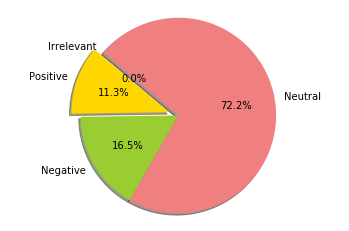

In [50]:
results()

--------------------------------------END EXECUTION-----------------------------------------------